<span style="font-size:12px;">

▶ EfficentNet : 2019 Google Brain
- 딥러닝 CNn 구조를 효율적으로 확장하는 방법을 제시한 모델
- 기존 모델보다 파마메터 수를 줄이고 더 정확도를 높임
- 기존 CNN
    - 깊이 : ResNet (50 -> 101) 층을 더 쌓는다
    - 너비 : WideResnet 각 층의 채널수를 놀린다
    - 해상도 : 224 -> 331 큰 이미지를 사용
    => 각각 따로 늘리면 성능 향상 대비 비용이 너무 크기 떄문에 균형 잡힌 확장 방법을 제시
- 깊이 너비 해상도 --> 비율로 동시에 확장. 균형 잡히게 조금씩 다 키우자!
- BaseLine MBConv => 적은 연산량으로 성능을 유지하기 위해 채널을 확장했다가 다시 줄이는 병목구조의 합셩곱 블록

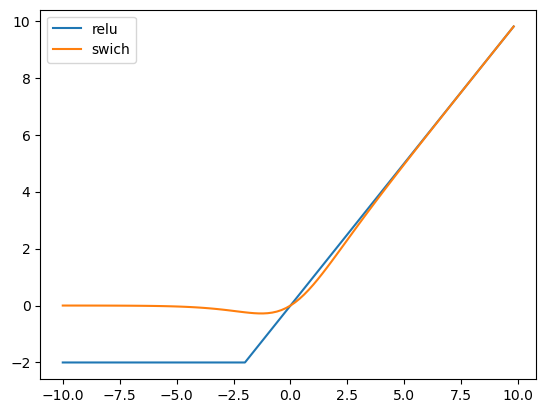

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit     # 시그모이드 함수와 동일
# ~10 - 10 까지의 0.2 간격
x = np.arange(-10,10,0.2)

# ReLU함수
# x.clip(0) 0보다 작으면 0, 0보다 크면 x 자신으로 만듦
plt.plot(x, x.clip(0), label = 'relu')

# swich 함수
plt.plot(x, x * expit(x), label='swich')
plt.legend()
plt.show()


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from tqdm import tqdm   # 학습진행률

In [26]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4,0.4,0.4),(0.2,0.2,0.2))
])
# 이미지 데이터 로드
trainset = torchvision.datasets.CIFAR10(root = './', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root = './', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64)
classs = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck')
model = models.efficientnet_b0(weights=True)


Files already downloaded and verified
Files already downloaded and verified


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# 손실함수 옵티마이져
criterion = nn.CrossEntropyLoss()
# 기존모델의 가중치 + 사용자의 데이터로 학습  -> fine turnning -> learing rage를 작게 가져오는 경향이 있음 (보통 1e-3인데 1e-4정도)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
for epoch in range(5):
    batch_loss = 0
    for i, data in enumerate(tqdm(trainloader)):
        optimizer.zero_grad()
        inputs, labels = data[0].to(device),data[1].to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'epoch : {epoch+1} loss : {batch_loss/len(trainloader)}')


  0%|          | 0/782 [00:00<?, ?it/s]

  3%|▎         | 20/782 [14:30<9:12:28, 43.50s/it]
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001B52360BC10>>
Traceback (most recent call last):
  File "c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\ipykernel\ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 